<a href="https://colab.research.google.com/github/KumarHarsh37/Epidemic-Analysis/blob/main/GRU_Andaman_Nicobar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/Andaman.csv')

In [ ]:
ts_Andaman = ts[ts['State'] ==  'Andaman and Nicobar Islands']

In [ ]:
ts_Andaman = ts_Andaman.drop(columns=['Negative'])

In [ ]:
ts_Andaman_clean = ts_Andaman.dropna()

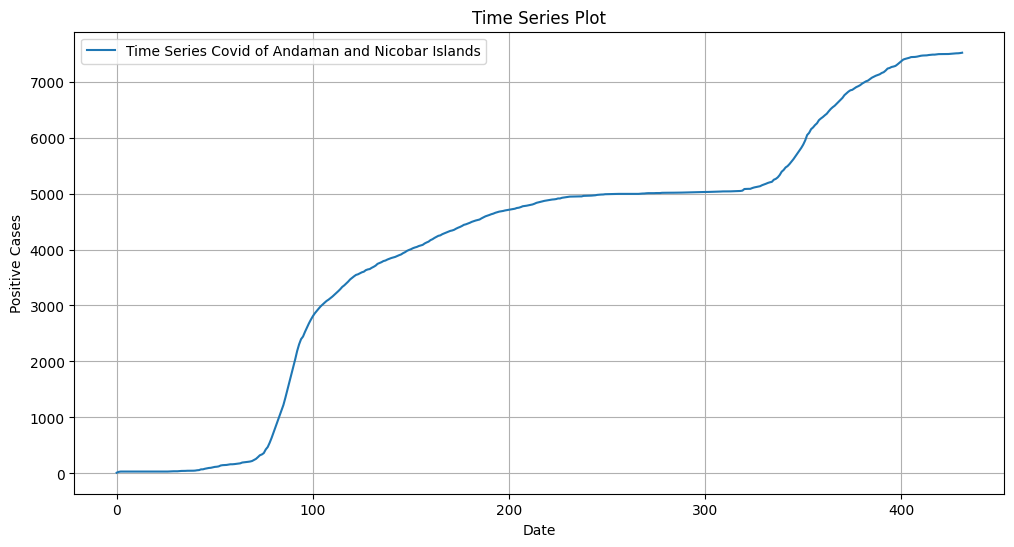

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ts_Andaman_clean.index, ts_Andaman_clean['Positive'], label='Time Series Covid of Andaman and Nicobar Islands')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt

# Load and prepare the data
data = ts_Andaman_clean[['Date', 'Positive']].copy()  # Adjust column names if needed
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Positive'].values.reshape(-1, 1))

def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

# Set the number of time steps
n_steps = 30
X, y = prepare_data(scaled_data, n_steps)

# Reshape X to be compatible with LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model_gru.add(GRU(50, activation='relu'))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Train the model
model_gru.fit(X, y, epochs=50, verbose=1)

# Forecast future values
forecast_gru = []
forecast_input = scaled_data[-n_steps:]
# Forecast future values
n_forecast = 30
forecast_input = scaled_data[-n_steps:]
forecast = []

for _ in range(n_forecast):
    forecast_input = forecast_input.reshape((1, n_steps, 1))
    prediction = model_gru.predict(forecast_input, verbose=0)
    forecast_gru.append(prediction[0, 0])
    forecast_input = np.append(forecast_input[0, 1:], prediction[0, 0])

# Inverse scale the forecast
forecast_gru = scaler.inverse_transform(np.array(forecast_gru).reshape(-1, 1))




Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3542
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1038
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0176
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0039
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.4200e-04
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.4869e-04
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0636e-04
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.3179e-04
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2.3446e-04
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.0375e-04
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.6379e-04
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.7965e-04
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.8126e-04
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━

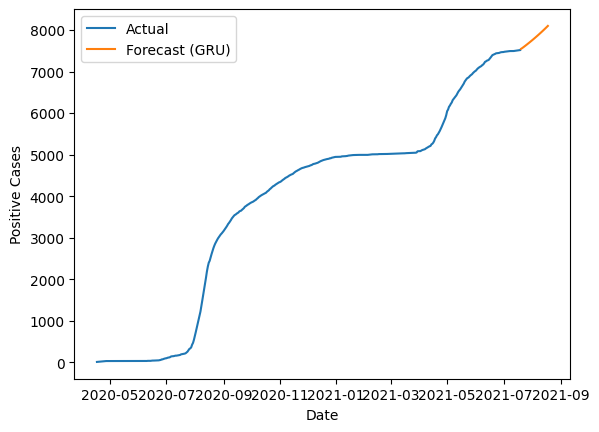

In [ ]:
# Plot the results
plt.plot(data.index, data['Positive'], label="Actual")
future_dates = pd.date_range(data.index[-1], periods=n_forecast+1, freq='D')[1:]
plt.plot(future_dates, forecast_gru, label="Forecast (GRU)")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and test sets (adjust if needed)
train_size = int(len(scaled_data) * 0.8)
test_data = scaled_data[train_size:]

# Prepare test set for evaluation
X_test, y_test = prepare_data(test_data, n_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test set
y_pred = model_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Inverse scale predictions
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse scale actual values

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate accuracy as a percentage (optional)
mean_actual = np.mean(y_test)
accuracy = (1 - (mae / mean_actual)) * 100
print(f"Model accuracy: {accuracy:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Mean Squared Error (MSE): 512.929378407343
Mean Absolute Error (MAE): 20.72256905691966
Model accuracy: 99.72%


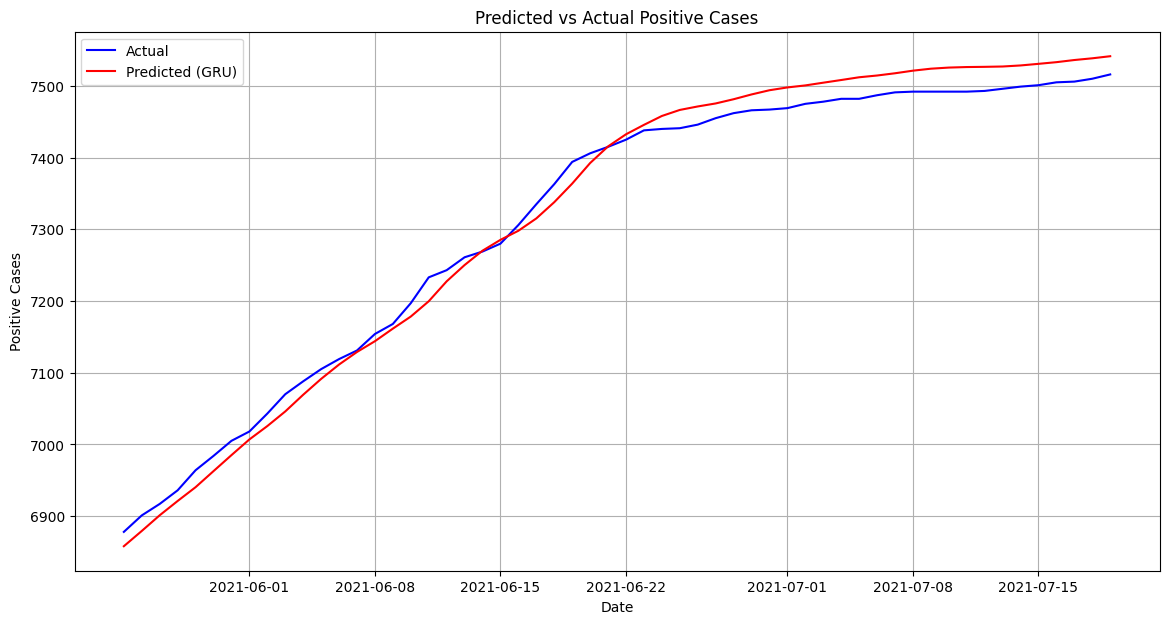

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted (GRU)', color='red')

plt.title('Predicted vs Actual Positive Cases')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.legend()
plt.grid(True)
plt.show()